# BDA 507 Term Project

### Oguz Kirazdiken ID - 311902013

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

### Civilization Of Data

In [2]:
scores = pd.read_csv("https://github.com/oguzkirazdiken/oguz.kirazdiken/raw/master/results.csv")


In [3]:
scores['Winner'] = 'Empty'

scores['Loser'] = 'Empty'


In [4]:

for i in range(len(scores)):
    if scores.loc[i, 'home_score'] > scores.loc[i, 'away_score']:
        scores.loc[i, 'Winner'] = scores.loc[i,'home_team']
        scores.loc[i, 'Loser'] = scores.loc[i,'away_team']
    elif scores.loc[i,'home_score'] < scores.loc[i,'away_score']:
        scores.loc[i, 'Winner'] = scores.loc[i,'away_team']
        scores.loc[i, 'Loser'] = scores.loc[i,'home_team']
    else:
        scores.loc[i, 'Winner'] = 'tie'
        scores.loc[i, 'Loser'] = 'tie'


In [5]:
scores.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie,tie
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie,tie
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England


In [6]:
scores['Year'] = scores['date'].apply(lambda x : int(x.split('-')[0]))

scores['Month'] = scores['date'].apply(lambda x : int(x.split('-')[1]))

scores['Day'] = scores['date'].apply(lambda x : int(x.split('-')[2]))


In [7]:
scores['total_goals'] = scores['home_score'] + scores['away_score']

In [8]:
scores.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Year,Month,Day,total_goals
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,tie,tie,1872,11,30,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,1873,3,8,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,1874,3,7,3
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,tie,tie,1875,3,6,4
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,1876,3,4,3


### Total Goals Per Year

In [9]:
sum_goals = []
for i in list(np.unique(scores['Year'])):
    sum_goals.append(scores[scores['Year']==i]['total_goals'].sum())


In [10]:
total_goals_per_year = pd.DataFrame(sum_goals,np.unique(scores['Year'])).reset_index()

total_goals_per_year.columns = ['years','total_goals']

total_goals_per_year.sort_values(by=['total_goals'],ascending=False).head()

,years,total_goals
147,2019,3251
129,2001,3101
132,2004,3098
139,2011,2980
136,2008,2950


### Last Seven Years Total Goals

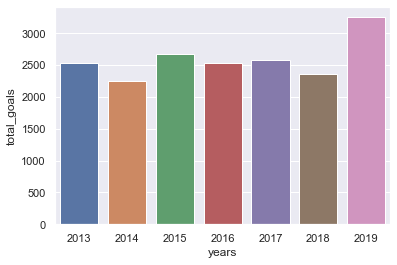

In [11]:

total_goals_after_2012 = total_goals_per_year.query("years > 2012")

sns.barplot(x='years',y='total_goals',data=total_goals_after_2012)


In [12]:
notie = scores.query("Winner !='tie'")

notie.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,Winner,Loser,Year,Month,Day,total_goals
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,Scotland,1873,3,8,6
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,England,1874,3,7,3
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,England,1876,3,4,3
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,Scotland,Wales,1876,3,25,4
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False,Scotland,England,1877,3,3,4


### Most Winning Five Country

In [13]:
country_wins_total = pd.DataFrame(notie.groupby("Winner").Winner.count())

country_wins_total.rename(columns={'Winner': 'total_number_of_wins'}, inplace=True)

first_five = country_wins_total.sort_values(by = ['total_number_of_wins'],ascending=False).head(5).reset_index()

first_five.head()

,Winner,total_number_of_wins
0,Brazil,625
1,England,572
2,Germany,555
3,Argentina,526
4,Sweden,498


We found our first 5 national team which have the highest number of total wins.

### Most Winning Five Countries' Last 3 Year Performances

In [14]:
all_matches_of_first_five = notie[notie.Winner.isin(first_five['Winner'])]

all_matches_of_first_five_after_sixteen = all_matches_of_first_five.query("Year > 2016")

total_wins_per_year = pd.DataFrame(all_matches_of_first_five.groupby(['Winner','Year']).count()).reset_index()

total_wins_after_sixteen_per_year = pd.DataFrame(all_matches_of_first_five_after_sixteen.groupby(['Winner','Year']).count()).reset_index()

total_wins_after_sixteen_per_year = total_wins_after_sixteen_per_year.iloc[:,0:3]

total_wins_after_sixteen_per_year.columns = ["Winner","Year","Total Wins"]

total_wins_after_sixteen_per_year


,Winner,Year,Total Wins
0,Argentina,2017,5
1,Argentina,2018,7
2,Argentina,2019,7
3,Brazil,2017,7
4,Brazil,2018,13
5,Brazil,2019,8
6,England,2017,5
7,England,2018,10
8,England,2019,7
9,Germany,2017,11


### Most Winning Five Countries in FIFA World Cup Matches

In [15]:
world_cup_matches = notie.query("tournament == 'FIFA World Cup' and Year > 1938")

world_cup_total_wins_per_team = pd.DataFrame(world_cup_matches.groupby("Winner").Winner.count())

world_cup_total_wins_per_team.rename(columns={'Winner': 'total_number_of_wins'}, inplace=True)

first_five_world_cup = world_cup_total_wins_per_team.sort_values(by = ['total_number_of_wins'],ascending=False).head(5).reset_index()

first_five_world_cup.head()

,Winner,total_number_of_wins
0,Brazil,69
1,Germany,64
2,Argentina,39
3,Italy,37
4,France,32


### Real Performance Analysis

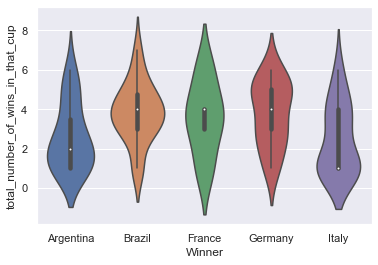

In [16]:

winning_world_cup_matches_of_first_five = world_cup_matches[world_cup_matches.Winner.isin(first_five_world_cup['Winner'])]

total_wins_first_five_per_year = pd.DataFrame(winning_world_cup_matches_of_first_five.groupby(['Winner','Year']).date.count()).reset_index()

total_wins_first_five_per_year.rename(columns={'date': 'total_number_of_wins_in_that_cup'}, inplace=True)

sns.violinplot(x = "Winner",y="total_number_of_wins_in_that_cup",data=total_wins_first_five_per_year)


Although the average number of match wins was the same for Brazil, France and Germany, but Germany has consistently won more matches in each tournament than its competitors.

### Frequency of Total Goals in FIFA World Cup Matches

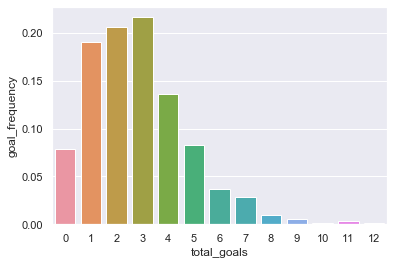

In [17]:
world_cup_total_goal_frequency_table = \
    pd.DataFrame(scores.query("tournament == 'FIFA World Cup'").total_goals.value_counts(normalize=True).sort_values(ascending=False)).reset_index()

world_cup_total_goal_frequency_table.rename(columns={'index': 'total_goals','total_goals': 'goal_frequency'}, inplace=True)

world_cup_total_goal_frequency_table = world_cup_total_goal_frequency_table.sort_values('total_goals')

sns.barplot(x='total_goals',y='goal_frequency',data=world_cup_total_goal_frequency_table)


### Clustering With K Means

Clustering with K means according to percentage of wins as an home_team or away_team since 2013

In [18]:
notie = scores.query("Winner !='tie'")

In [19]:
notie['home_wins'] = 'Empty'
notie['away_wins'] = 'Empty'

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
notie = notie.query("tournament == 'FIFA World Cup' and Year > 2013")

In [21]:
for i in range(len(notie)):
    if notie.iloc[i, 3] > notie.iloc[i, 4]:
        notie.iloc[i, 15] = 1
        notie.iloc[i, 16] = 0
    else:
        notie.iloc[i, 15] = 0
        notie.iloc[i, 16] = 1

In [22]:
win_types = notie.groupby("Winner").sum()[["home_wins","away_wins"]]
win_types = win_types.query("home_wins + away_wins != 1")

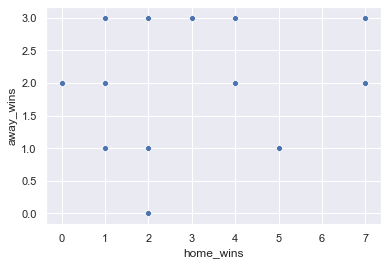

In [23]:
sns.scatterplot(x='home_wins',y='away_wins',data=win_types)

In [24]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(win_types)

centroids = kmeans.cluster_centers_

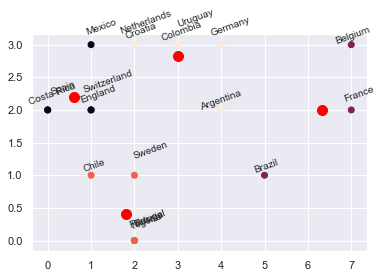

In [25]:
plt.scatter(win_types['home_wins'],win_types['away_wins'],c=kmeans.labels_.astype(float))
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100)
countries = list(win_types.index)
count = 0
for x,y in zip(win_types['home_wins'],win_types['away_wins']):

    label = countries[count]

    plt.annotate(label, 
                 (x,y), 
                 textcoords="offset points", 
                 xytext=(count,count),
                 ha = 'center',
                 rotation=20)                        
    count += 1
    

